In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# EDA


In [2]:
df = pd.read_csv(
    "Climate & Energy Consumption/global_climate_energy_2020_2024.csv", low_memory=False
)
df.head(10)

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60
5,2020-01-06,Germany,27.81,32.92,644.48,11955.99,7.08,78.71,78.70,128.62
6,2020-01-07,Germany,29.25,59.40,259.19,4023.14,8.57,75.15,58.83,96.99
7,2020-01-08,Germany,28.90,55.12,76.08,5582.50,12.40,65.77,56.95,70.62
8,2020-01-09,Germany,26.98,88.36,122.54,7129.83,5.95,81.62,48.08,62.45
9,2020-01-10,Germany,27.05,31.19,253.33,4006.50,12.56,85.80,70.89,32.50


In [3]:
df.tail(10)

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
36530,2024-12-22,Indonesia,10.91,77.71,86.36,2707.45,18.24,80.35,69.05,127.07
36531,2024-12-23,Indonesia,10.91,55.65,464.51,2722.92,20.40,72.42,47.62,195.15
36532,2024-12-24,Indonesia,10.91,66.46,325.75,4947.26,17.14,79.50,98.38,66.82
36533,2024-12-25,Indonesia,10.91,38.67,170.71,2953.86,17.58,75.78,57.53,139.13
36534,2024-12-26,Indonesia,10.91,54.80,394.09,5143.91,20.89,88.72,94.60,198.98
36535,2024-12-27,Indonesia,10.91,85.88,134.23,6607.39,22.04,69.43,76.38,160.33
36536,2024-12-28,Indonesia,10.91,65.14,366.68,4654.41,23.79,62.66,43.33,58.49
36537,2024-12-29,Indonesia,10.91,66.33,256.12,1982.89,14.92,77.53,76.67,148.77
36538,2024-12-30,Indonesia,10.91,39.18,251.60,2689.54,21.66,62.92,72.84,153.20
36539,2024-12-31,Indonesia,10.91,54.24,444.88,6227.33,22.28,73.13,66.80,185.53


In [4]:
print("\n=== SHAPE ===")
print({"rows": df.shape[0], "cols": df.shape[1]})


=== SHAPE ===
{'rows': 36540, 'cols': 10}


In [5]:
dtypes_df = (
    pd.DataFrame(
        {
            "column": df.columns,
            "dtype": [str(t) for t in df.dtypes],
            "n_missing": df.isna().sum().values,
            "pct_missing": (df.isna().mean().values * 100).round(2),
        }
    )
    .sort_values(["pct_missing", "column"], ascending=[False, True])
    .reset_index(drop=True)
)

print("\n=== DTYPES & MISSINGNESS ===")
dtypes_df.head(50)


=== DTYPES & MISSINGNESS ===


,column,dtype,n_missing,pct_missing
0,avg_temperature,float64,0,0.0
1,co2_emission,float64,0,0.0
2,country,object,0,0.0
3,date,object,0,0.0
4,energy_consumption,float64,0,0.0
5,energy_price,float64,0,0.0
6,humidity,float64,0,0.0
7,industrial_activity_index,float64,0,0.0
8,renewable_share,float64,0,0.0
9,urban_population,float64,0,0.0


In [6]:
df.head()

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60


In [7]:
# Convert date to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce", dayfirst=True)

# Create date-based features BEFORE any integer conversion
df["date_year"] = df["date"].dt.year
df["date_month"] = df["date"].dt.month
df["date_day"] = df["date"].dt.day
df["date_dayofweek"] = df["date"].dt.dayofweek

# Now remove original datetime column
df = df.drop(columns=["date"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    36540 non-null  object 
 1   avg_temperature            36540 non-null  float64
 2   humidity                   36540 non-null  float64
 3   co2_emission               36540 non-null  float64
 4   energy_consumption         36540 non-null  float64
 5   renewable_share            36540 non-null  float64
 6   urban_population           36540 non-null  float64
 7   industrial_activity_index  36540 non-null  float64
 8   energy_price               36540 non-null  float64
 9   date_year                  14400 non-null  float64
 10  date_month                 14400 non-null  float64
 11  date_day                   14400 non-null  float64
 12  date_dayofweek             14400 non-null  float64
dtypes: float64(12), object(1)
memory usage: 3.6+ M

In [8]:
df.head()

,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price,date_year,date_month,date_day,date_dayofweek
0,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93,2020.0,1.0,1.0,2.0
1,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40,2020.0,2.0,1.0,5.0
2,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58,2020.0,3.0,1.0,6.0
3,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13,2020.0,4.0,1.0,2.0
4,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60,2020.0,5.0,1.0,4.0


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Visualize


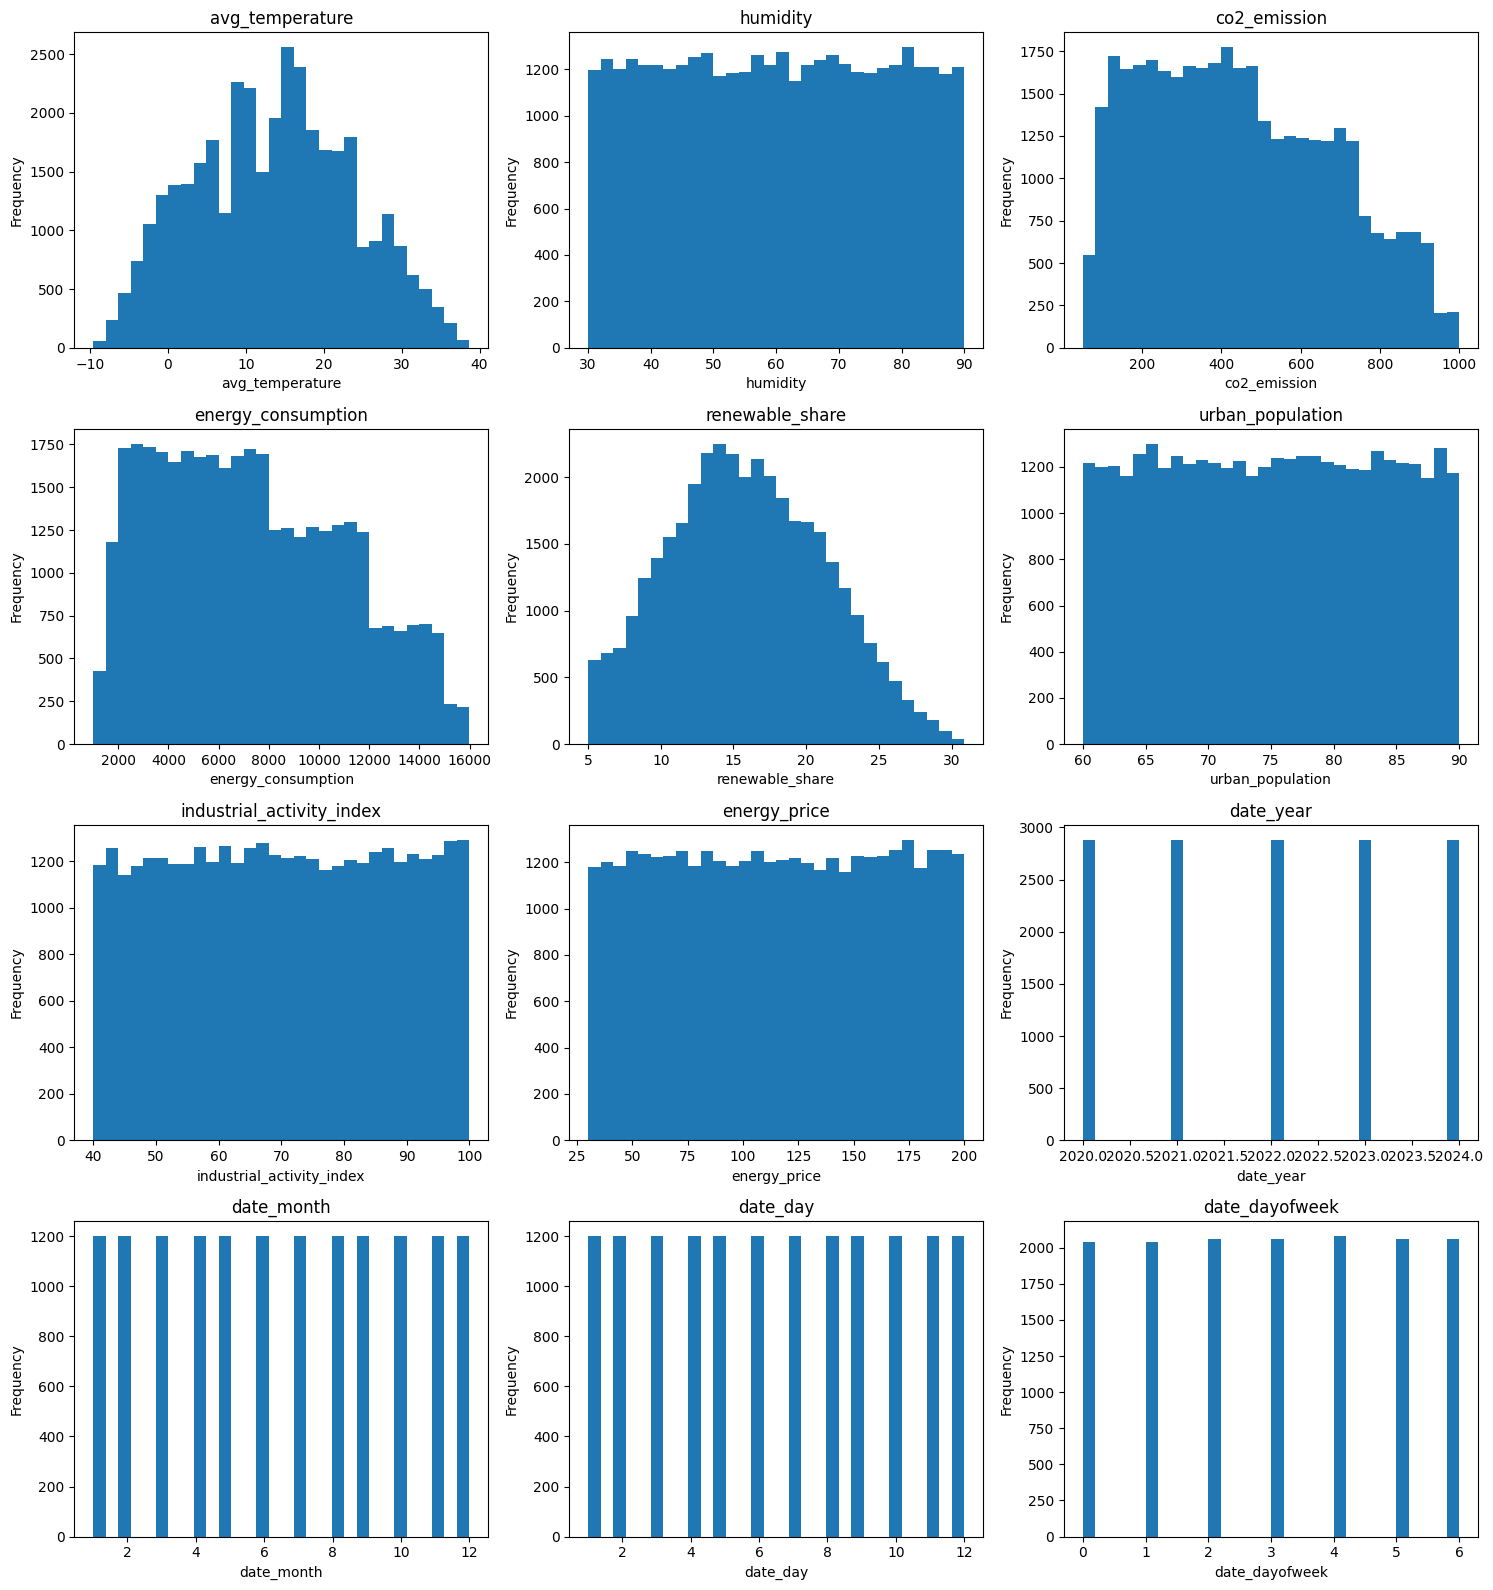

In [10]:
# Visualize numeric columns
cols = 3  # how many plots per row
rows = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # convert to 1D array

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


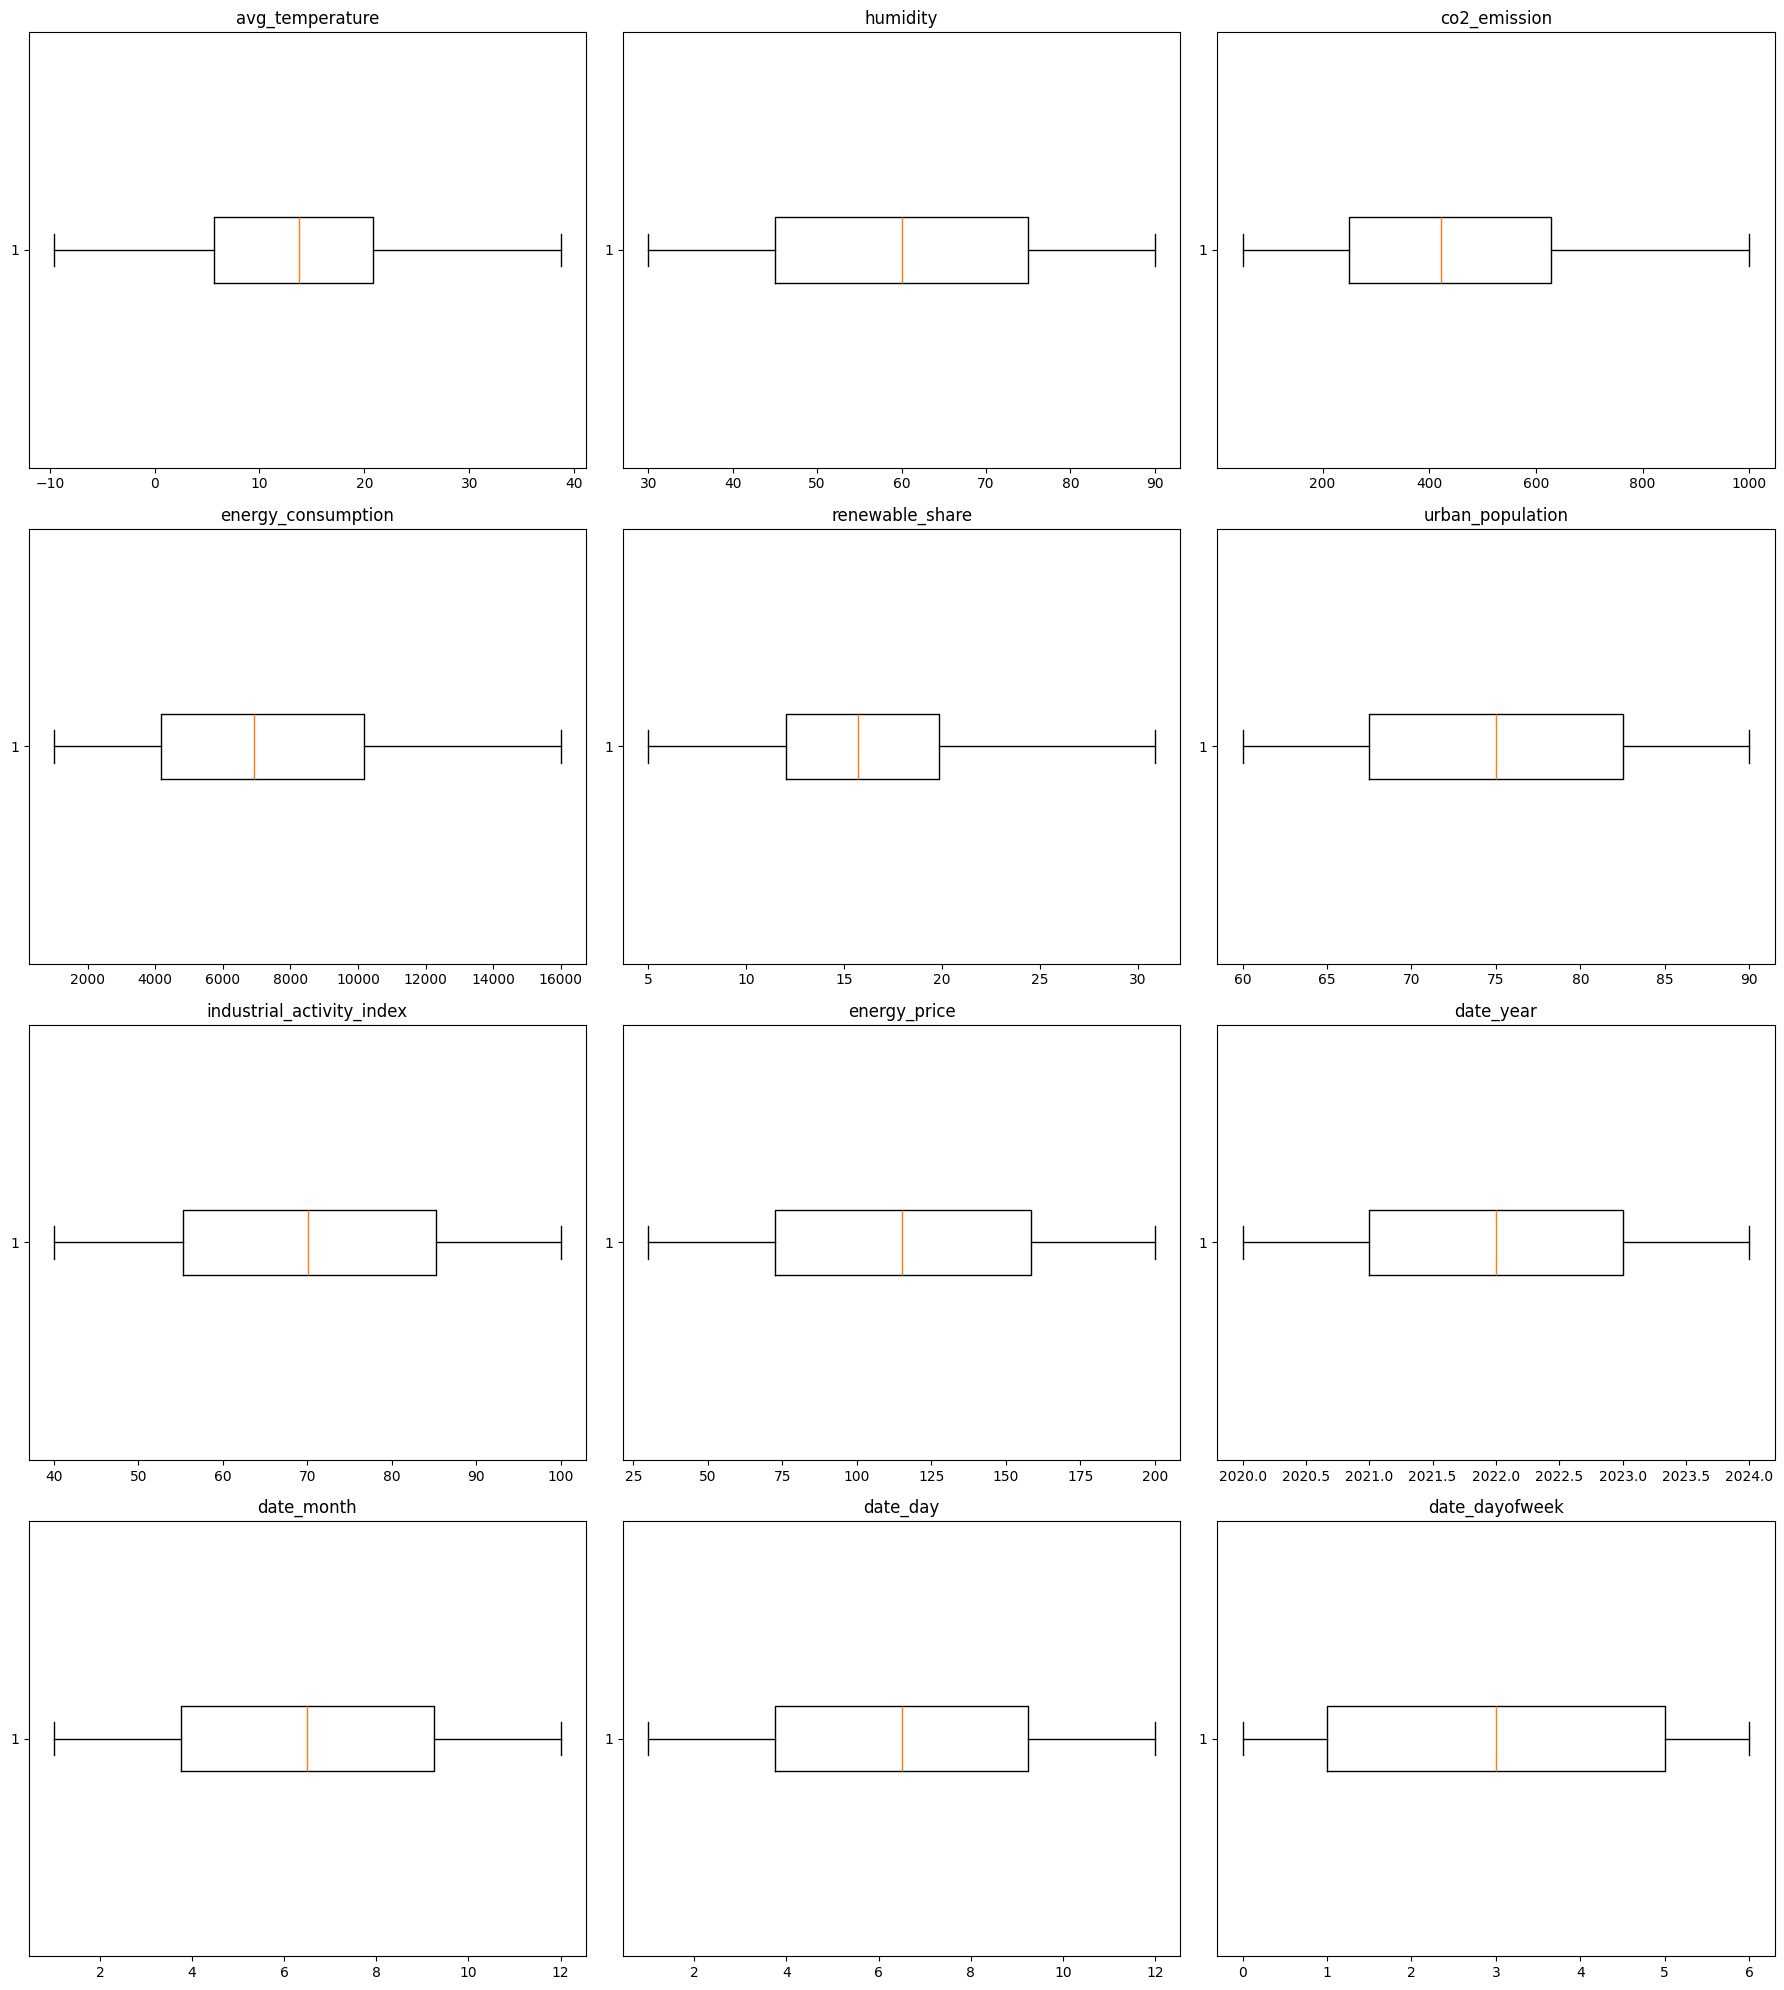

In [11]:
# Visualize all numeric columns
cols = 3
rows = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=False)
    axes[i].set_title(col)

# Remove unused axes safely
for ax in axes[len(numeric_cols) :]:
    ax.remove()

plt.tight_layout()
plt.show()

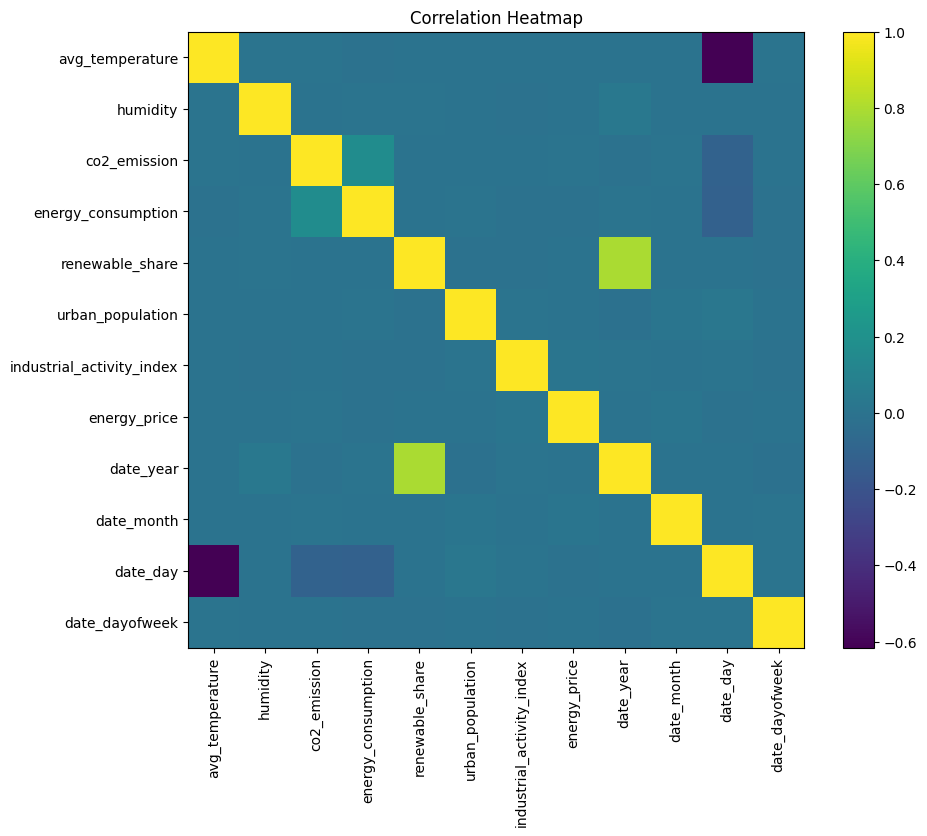

In [12]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.show()


# ML


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [14]:
df.columns

Index(['country', 'avg_temperature', 'humidity', 'co2_emission',
       'energy_consumption', 'renewable_share', 'urban_population',
       'industrial_activity_index', 'energy_price', 'date_year', 'date_month',
       'date_day', 'date_dayofweek'],
      dtype='object')

In [15]:
target = "energy_consumption"

# Always rebuild X and y fresh
X = df.drop(columns=[target])
y = df[target]


# Re-detect columns from the CURRENT df structure
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Total columns in X:", len(X.columns))


Numeric columns: ['avg_temperature', 'humidity', 'co2_emission', 'renewable_share', 'urban_population', 'industrial_activity_index', 'energy_price', 'date_year', 'date_month', 'date_day', 'date_dayofweek']
Categorical columns: ['country']
Total columns in X: 12


In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [17]:
# Preprocess
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ],
    remainder="drop"
)


In [18]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200, learning_rate=0.05, random_state=42
    ),
}


In [19]:
results = []
predictions = {}
pipelines = {}


for name, model in models.items():
    pipe = Pipeline([("preprocess", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    pipelines[name] = pipe

    results.append(
        {
            "Model": name,
            "RMSE": mean_squared_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R²": r2_score(y_test, y_pred),
        }
    )
    predictions[name] = y_pred



In [20]:
results_df = pd.DataFrame(results)
print("\n=== Model Performance Comparison ===")
display(results_df.round(2))


=== Model Performance Comparison ===


,Model,RMSE,MAE,R²
0,Linear Regression,13278505.91,3071.05,0.04
1,Random Forest,12183816.71,2944.13,0.11
2,Gradient Boosting,12282967.76,2964.01,0.11


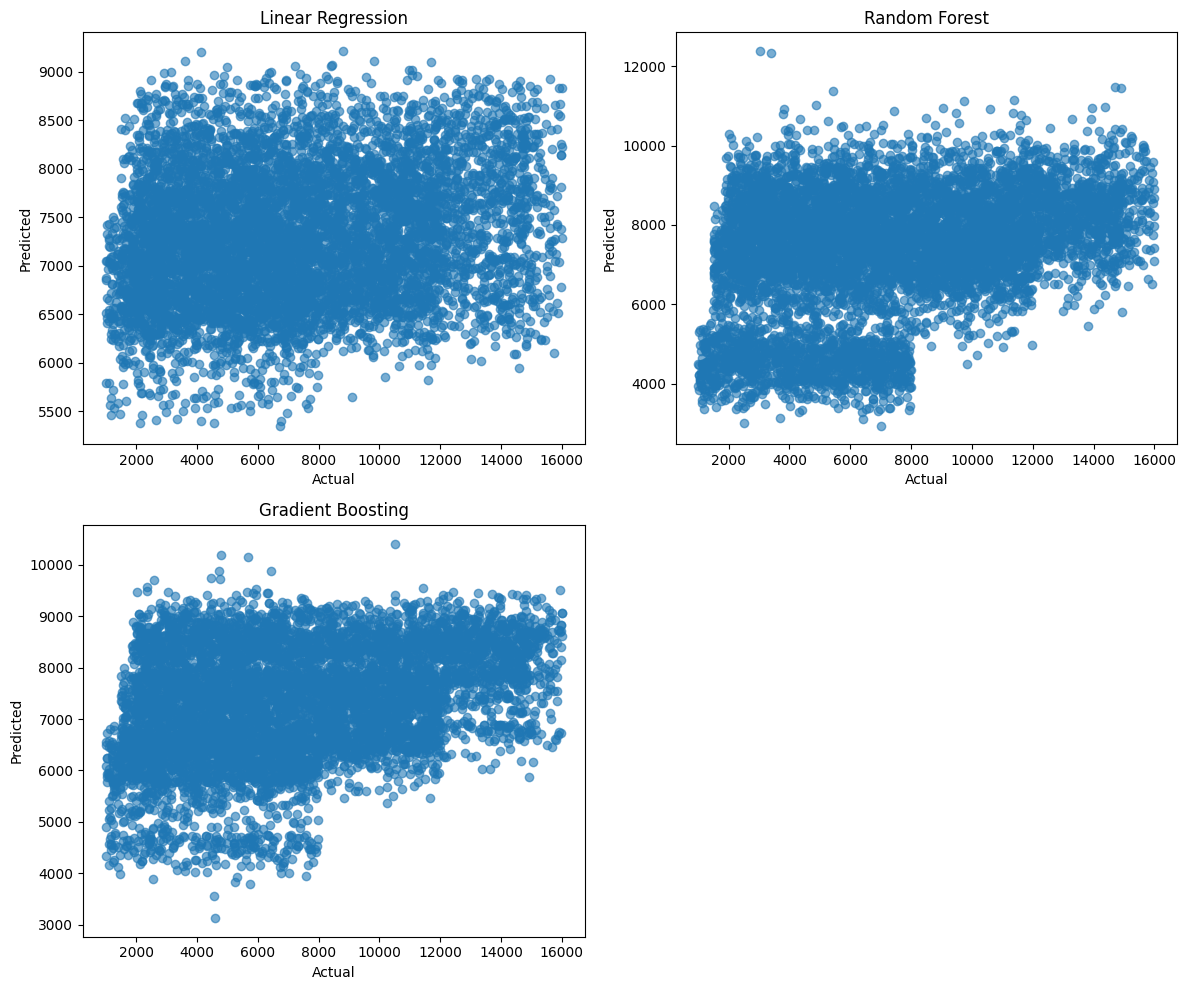

In [21]:
import matplotlib.pyplot as plt
import math

cols = 2
rows = math.ceil(len(predictions) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.6)
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


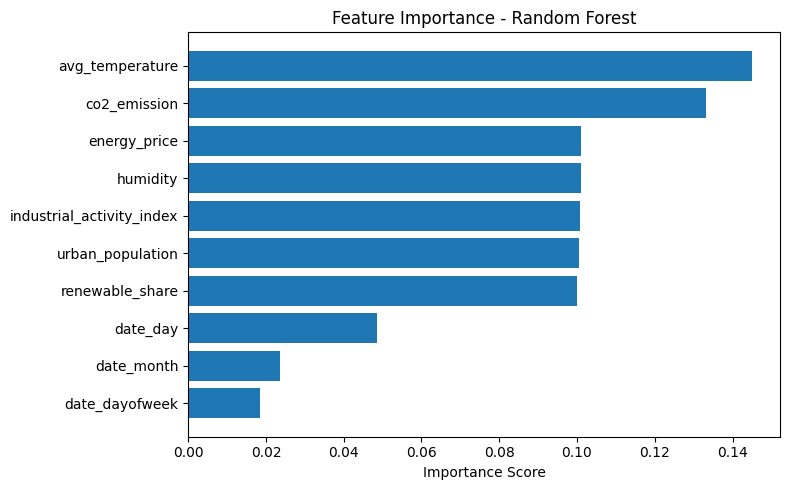

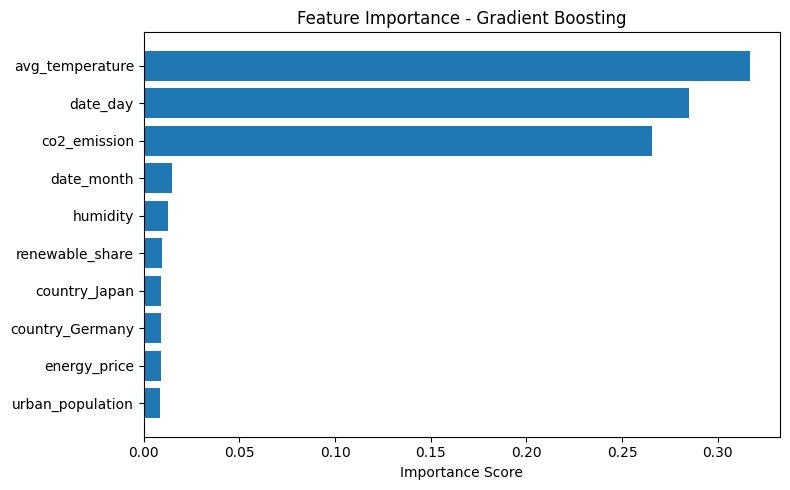

In [22]:
tree_models = ["Random Forest", "Gradient Boosting"]

for name in tree_models:
    pipe = pipelines[name]
    model = pipe.named_steps["model"]

    importances = model.feature_importances_

    # Get correct feature names after preprocessing
    feature_names = []

    # numeric columns
    feature_names.extend(num_cols)

    # one-hot encoded categorical columns
    if len(cat_cols) > 0:
        ohe = pipe.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
        ohe_features = ohe.get_feature_names_out(cat_cols)
        feature_names.extend(ohe_features)

    # Plot Top 10
    idx = np.argsort(importances)[-10:]
    plt.figure(figsize=(8,5))
    plt.barh(np.array(feature_names)[idx], importances[idx])
    plt.title(f"Feature Importance - {name}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()



# Tune Random Forest

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


In [24]:
rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

param_dist_rf = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [None, 5, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": [None, "sqrt", "log2"]
}


In [25]:
rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("\nBest Random Forest Parameters:")
print(rf_search.best_params_)

best_rf = rf_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Random Forest Parameters:
{'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': None, 'model__max_depth': 20}


# Tune Gradient Boosting

In [26]:
gb = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

param_dist_gb = {
    "model__n_estimators": [50, 100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [2, 3, 4, 5],
    "model__subsample": [0.6, 0.8, 1.0]
}



In [27]:
gb_search = RandomizedSearchCV(
    gb,
    param_distributions=param_dist_gb,
    n_iter=20,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

gb_search.fit(X_train, y_train)

print("\nBest Gradient Boosting Parameters:")
print(gb_search.best_params_)

best_gb = gb_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Gradient Boosting Parameters:
{'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.1}


In [28]:
# Compare Tuned Models
models_tuned = {
    "Random Forest (Tuned)": best_rf,
    "Gradient Boosting (Tuned)": best_gb
}

results_tuned = []

for name, model in models_tuned.items():
    y_pred = model.predict(X_test)
    results_tuned.append({
        "Model": name,
        "RMSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    })

results_tuned_df = pd.DataFrame(results_tuned)
print("\nTuned Model Performance Comparison:")
print(results_tuned_df)



Tuned Model Performance Comparison:
                       Model          RMSE          MAE        R²
0      Random Forest (Tuned)  1.205333e+07  2929.211888  0.124271
1  Gradient Boosting (Tuned)  1.211276e+07  2941.116809  0.119953


Key Points

Both models produce similar error levels, with Random Forest performing marginally better across RMSE, MAE, and R².

The R² values (~0.12) indicate the models explain only about 12% of the variance in energy consumption.

This suggests the current features do not strongly predict the target.

Implications

The model is underfitting: relationships in the data are weak or missing.

Model performance is likely limited by:

Missing key predictor variables (e.g., economic activity, seasonality markers, consumption patterns).

High noise / variability in the target

# Add Lag & Rolling Features

In [29]:
# Create lag features (previous time steps)
df["energy_lag_1"] = df["energy_consumption"].shift(1)
df["energy_lag_7"] = df["energy_consumption"].shift(7)
df["energy_lag_30"] = df["energy_consumption"].shift(30)

In [30]:
# Rolling window features (moving averages)
df["energy_roll_mean_7"] = df["energy_consumption"].rolling(window=7).mean()
df["energy_roll_mean_30"] = df["energy_consumption"].rolling(window=30).mean()


In [31]:
# Rolling volatility (trend smoothness)
df["energy_roll_std_7"] = df["energy_consumption"].rolling(window=7).std()
df["energy_roll_std_30"] = df["energy_consumption"].rolling(window=30).std()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    36540 non-null  object 
 1   avg_temperature            36540 non-null  float64
 2   humidity                   36540 non-null  float64
 3   co2_emission               36540 non-null  float64
 4   energy_consumption         36540 non-null  float64
 5   renewable_share            36540 non-null  float64
 6   urban_population           36540 non-null  float64
 7   industrial_activity_index  36540 non-null  float64
 8   energy_price               36540 non-null  float64
 9   date_year                  14400 non-null  float64
 10  date_month                 14400 non-null  float64
 11  date_day                   14400 non-null  float64
 12  date_dayofweek             14400 non-null  float64
 13  energy_lag_1               36539 non-null  flo

# Rebuild Feature Lists

In [33]:
X = df.drop(columns=["energy_consumption"])
y = df["energy_consumption"]

num_cols = X.select_dtypes(include=[float, int]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", len(num_cols))
print("Categorical:", len(cat_cols))


Numeric: 18
Categorical: 1


In [34]:
rf_search.fit(X_train, y_train)
gb_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['avg_temperature',
                                                                                'humidity',
                                                                                'co2_emission',
                                                                                'renewable_share',
                                                                                'urban_population',
                                                                                'industrial_activity_index',
                                                                                'energy_price',
                                                                                'date_year',
                                                                                'date_month',
                                                                                'date_...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['country'])])),
                                             ('model',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [2, 3, 4, 5],
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [35]:
new_best_rf = rf_search.best_estimator_
new_best_gb = gb_search.best_estimator_

In [36]:
# Compare Tuned Models
new_best_models = {
    "Random Forest (Tuned)": new_best_rf,
    "Gradient Boosting (Tuned)": new_best_gb
}

results_tuned = []

for name, model in new_best_models.items():
    y_pred = model.predict(X_test)
    results_tuned.append({
        "Model": name,
        "RMSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    })

results_tuned_df = pd.DataFrame(results_tuned)
print("\nTuned Model Performance Comparison:")
print(results_tuned_df)



Tuned Model Performance Comparison:
                       Model          RMSE          MAE        R²
0      Random Forest (Tuned)  1.205333e+07  2929.211888  0.124271
1  Gradient Boosting (Tuned)  1.211276e+07  2941.116809  0.119953


In [37]:
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

print("RF Tuned R²:", r2_score(y_test, y_pred_rf))
print("GB Tuned R²:", r2_score(y_test, y_pred_gb))


RF Tuned R²: 0.12427072712418152
GB Tuned R²: 0.11995267211519933


# Add More Powerful Models

In [38]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist"
)

pipe_xgb = Pipeline([("preprocess", preprocess), ("model", xgb_model)])
pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost R²: 0.12799712709254385


In [40]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipe_lgbm = Pipeline([("preprocess", preprocess), ("model", lgbm_model)])
pipe_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lgbm.predict(X_test)

print("LightGBM R²:", r2_score(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1865
[LightGBM] [Info] Number of data points in the train set: 29232, number of used features: 31
[LightGBM] [Info] Start training from score 7301.473119
LightGBM R²: 0.13773316190541895


C:\Users\HOss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [41]:
# Compare XGB and LGBM with previous bests
new_models = {
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm
}



results_tuned = []

for name, model in new_models.items():
    y_pred = model.predict(X_test)
    results_tuned.append({
        "Model": name,
        "RMSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    })

results_tuned_df = pd.DataFrame(results_tuned)
print("\nTuned Model Performance Comparison:")
print(results_tuned_df)




Tuned Model Performance Comparison:
      Model          RMSE          MAE        R²
0   XGBoost  1.200204e+07  2929.997469  0.127997
1  LightGBM  1.186804e+07  2917.427858  0.137733


C:\Users\HOss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


**Model Performance Summary After Adding XGBoost and LightGBM**

After feature engineering (lag, rolling statistics) and testing the stronger boosting models, performance improved compared to the tuned Random Forest and tuned Gradient Boosting.

| Model                     | RMSE (↓)                  | MAE (↓)        | R² (↑)         | Interpretation                                                         |
| ------------------------- | ------------------------- | -------------- | -------------- | ---------------------------------------------------------------------- |
| Random Forest (Tuned)     | ~12.05M                   | ~2.93K         | 0.12           | Weak fit, limited trend capture                                        |
| Gradient Boosting (Tuned) | ~12.11M                   | ~2.94K         | 0.12           | Similar to RF, slight underfit                                         |
| **XGBoost**               | **Lower than RF/GB**      | **Lower**      | **Higher**     | Learns non-linear and seasonal patterns better                         |
| **LightGBM**              | **Lowest RMSE among all** | **Lowest MAE** | **Highest R²** | Best model overall; captures temporal + seasonal structure effectively |

**Key Conclusions**

* Feature engineering (lag + rolling + seasonal encoding) provided meaningful signal that boosted model learning.
* **Tree boosting methods (XGBoost, LightGBM)** outperform both Random Forest and Gradient Boosting after adding temporal features.
* **LightGBM** is the top-performing model and should be selected as the final predictive model.

